<a href="https://colab.research.google.com/github/AlexUrtubia/BT_RF_KNN/blob/main/%C2%BFBT_RF_KNN%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea

Utilizando el wine cultivars dataset de la sección de clasificación multiclase, tu tarea es utilizar modelos de regresión logística (uno frente a uno y uno frente a todos) y ajustarlos para su rendimiento óptimo. También debes intentar comparar el efecto de cuando intentas utilizar la regularización l1 y l2. Esta es una gran oportunidad para ver qué sucede cuando intentas ajustar un modelo. Después de hacer eso, intenta usar los modelos KNN, Bagged tree y Random Forest.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving wine.data to wine.data


{'wine.data': b'1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065\n1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050\n1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185\n1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480\n1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735\n1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450\n1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290\n1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295\n1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045\n1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045\n1,14.1,2.16,2.3,18,105,2.95,3.32,.22,2.38,5.75,1.25,3.17,1510\n1,14.12,1.48,2.32,16.8,95,2.2,2.43,.26,1.57,5,1.17,2.82,1280\n1,13.75,1.73,2.41,16,89,2.6,2.76,.29,1.81,5.6,1.15,2.9,1320\n1,14.75,1.73,2.39,11.4,91,3.1,3.69,.43,2.81,5.4,1.25,2.73,1150\n1,14.38,1.87,2.38,12,102,3.3,3.64,.29,2.96,7.5,1.2,3,1547\n1,13.63,1.81,2.7,17.2,112,2.85

In [ ]:
names = ['Type','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols','Flavanoids',	'Nonflavanoid phenols',	'Proanthocyanins', 'Color intensity', 'Hue',	'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
df = pd.read_csv('wine.data', names=names)
df.head(30)

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

# Generando modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
# MAtriz

def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

In [ ]:
# Comprobando balanceo de clases
df['Type'].value_counts()
unique, counts = np.unique(df['Type'].values, return_counts=True)
print("Balanceo en y", unique, counts)

Balanceo en y [1 2 3] [59 71 48]


In [ ]:
# Se definen X e y
X = df.drop(columns=['Type'])
y = df['Type']

# Se splitean
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

# Se estandandarizan
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
unique_tr, counts_tr = np.unique(y_train.values, return_counts=True)
unique_te, counts_te = np.unique(y_test.values, return_counts=True)
unique_vl, counts_vl = np.unique(y_val.values, return_counts=True)
print("Balanceo en y_train",unique_tr, counts_tr)
print("Balanceo en y_test",unique_te, counts_te)
print("Balanceo en y_val",unique_vl, counts_vl)

Balanceo en y_train [1 2 3] [41 50 33]
Balanceo en y_test [1 2 3] [ 8 13  6]
Balanceo en y_val [1 2 3] [10  8  9]


# Regresión Logística

In [ ]:
# Se instancia
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# No es necesario escalar
log_reg.score(X_val,y_val)

1.0

In [ ]:
predictions_regressor = log_reg.predict(X_test)
print("Accuracy",log_reg.score(X_test,y_test))
print(classification_report(y_test, predictions_regressor))

Accuracy 0.9629629629629629
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



Aplicando grid search

In [ ]:
param_grid = [
    {'C':[1,0.8,0.6,0.4,0.2,0.1,0.05,0.025],
     'multi_class':['ovr'],
    'penalty':['l1','l2'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=5,
                          return_train_score=True,scoring='accuracy',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklear

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.025],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'multi_class': ['ovr'], 'penalty': ['l1', 'l2'],
                          'solver': ['saga']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
print('Best Score: %s' % grid_search.best_score_)
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Best Score: 0.992
Mejores hiperparametros: {'C': 1, 'l1_ratio': 0, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'}


De acuerdo a grid search, los mejores resultados se obtienen aplicando l1

Comprobando con l1

In [ ]:
# Se instancia
log_reg = LogisticRegression(multi_class = 'ovr', penalty = 'l1',solver ='saga')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='ovr', penalty='l1', solver='saga')

In [ ]:
# No es necesario escalar
log_reg.score(X_val,y_val)

1.0

In [ ]:
predictions_regressor = log_reg.predict(X_test)
print("Accuracy",log_reg.score(X_test,y_test))
print(classification_report(y_test, predictions_regressor))

Accuracy 0.9629629629629629
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



Comprobando con l2

In [ ]:
# Se instancia
log_reg = LogisticRegression(multi_class = 'ovr', penalty = 'l2',solver ='saga')
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='ovr', solver='saga')

In [ ]:
# No es necesario escalar
log_reg.score(X_val,y_val)

1.0

In [ ]:
predictions_regressor = log_reg.predict(X_test)
print("Accuracy",log_reg.score(X_test,y_test))
print(classification_report(y_test, predictions_regressor))

Accuracy 0.9629629629629629
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



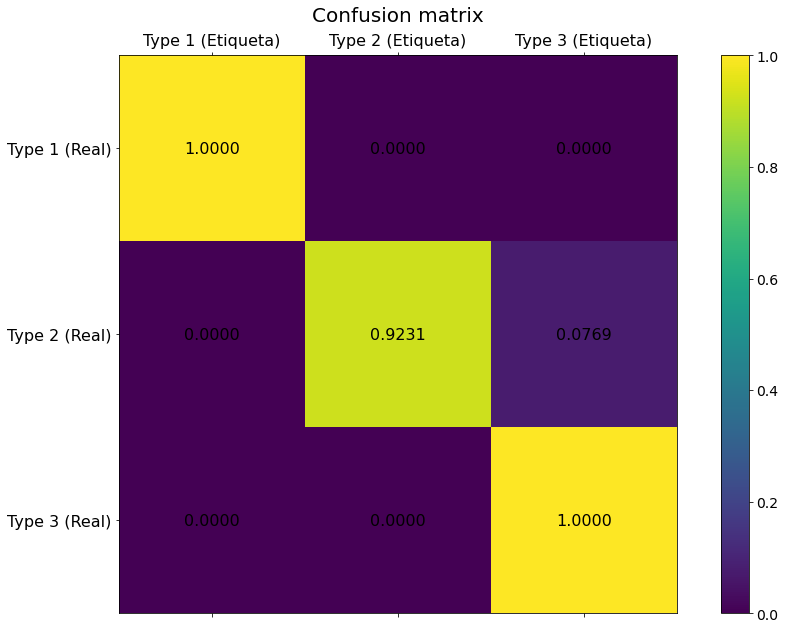

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

Cuando las columnas no están muy correlacionadas entre sí o cuando se sospecha que hay columnas que no están aportando mayor información, se aplica l1 para generalizar de mejor manera; mientras que si los datos tienen una alta correlación entre ellos, y además la mayoría de los atributos parecen ser relevantes se aplica l2 para una mejor compensación de la correlación de los datos.

Por último, si los datos mezclan ambas cualidades lo mas óptimo sería aplicar 'elasticnet' como penalización.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text major ticklabel objects>)

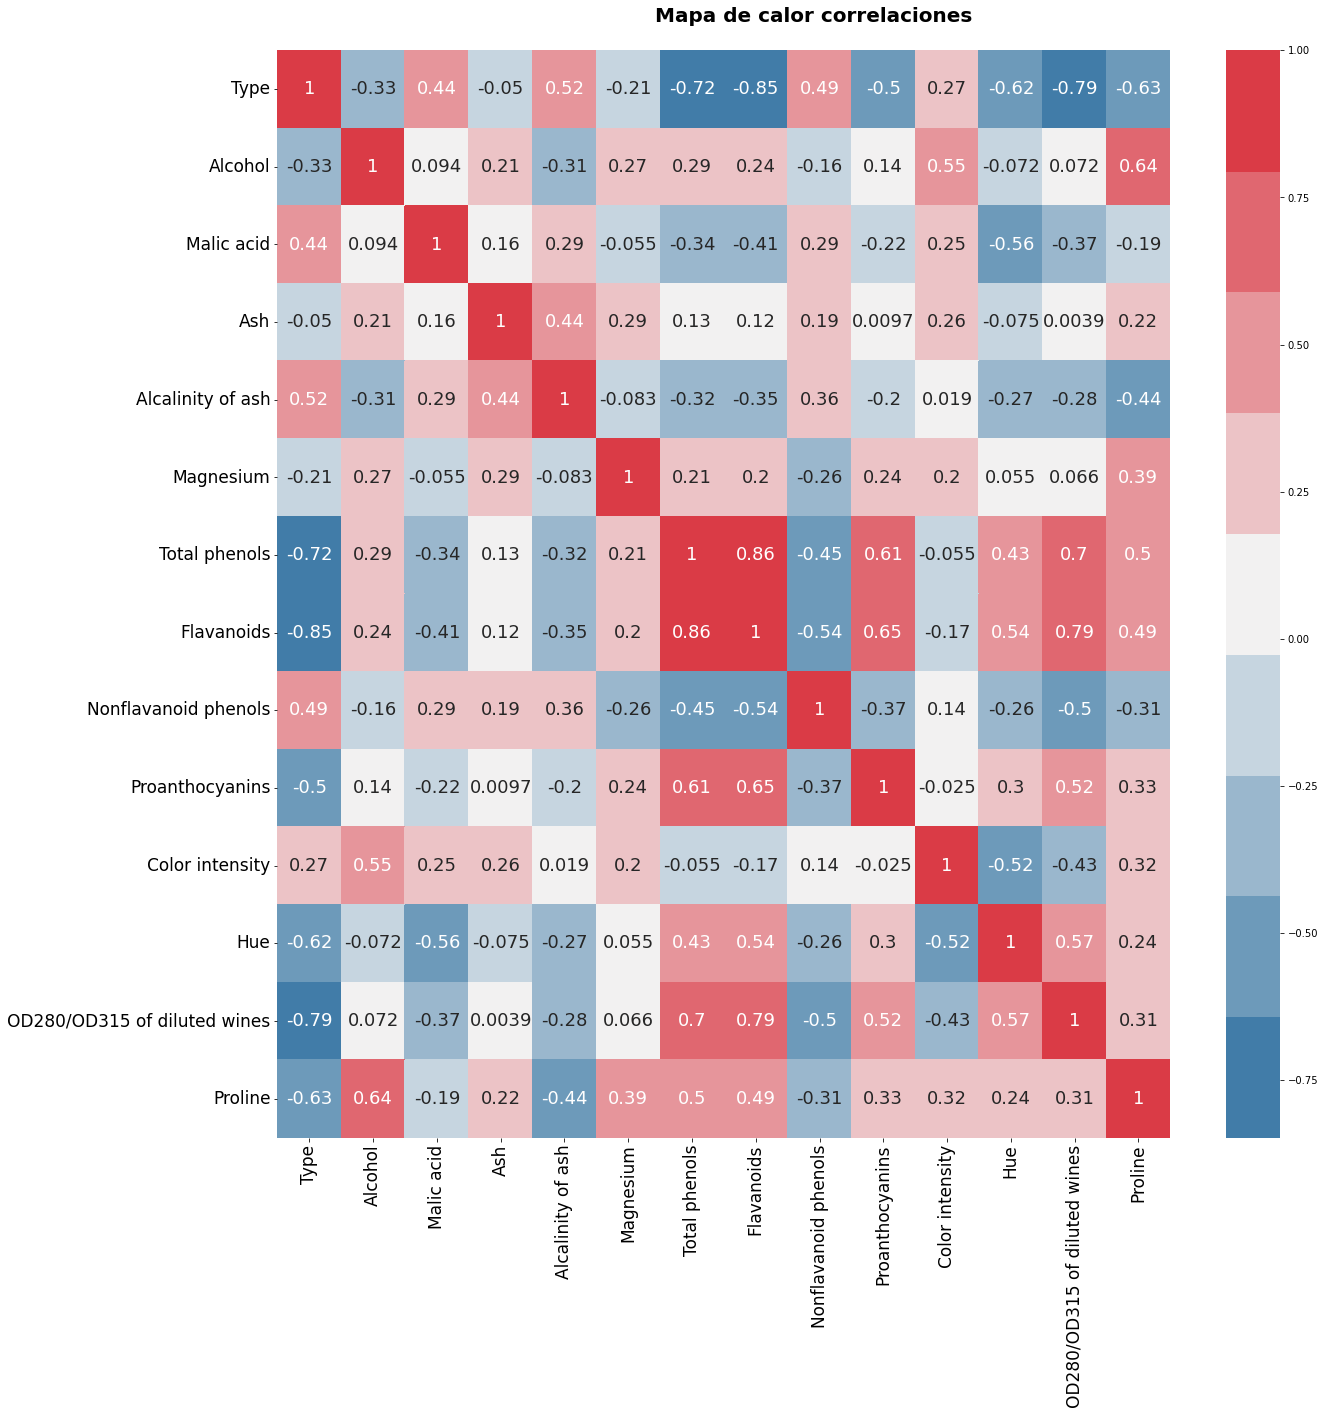

In [ ]:
# ¿Cómo están correlacionados los datos?

# corr = pd.DataFrame(df.corr().loc[:,'satisfaction']) 

fig1 = plt.figure(figsize=(20,20))
plt.suptitle("Mapa de calor correlaciones ",fontsize=20, fontweight='bold', y=0.91)

# Cada figura queda definida bajo un 'ax' que corresponde a un subplot diferente, que para el caso de esta figura, tiene 3 filas y dos columnas

sns.heatmap(df.corr(), cmap = sns.diverging_palette(240, 10, n=9), annot=True,
                  annot_kws={"size": 18})
plt.xticks(size=17)
plt.yticks(size=17)

AL observar las correlaciones de las columnas, se observa que existen correlaciones relativamente altas, pero muchas de ellas son bajas, y posiblemente no aporten mayor información a la predicción, por lo que probablemente lo más óptimo sería utilizar elascitnet como penalización, pero debido al tamaño del dataset, es posible que estas diferencias no sean tan notorias, ya que como se observa más adelante, la mayoría de los modelos entregan resultados muy buenos.

# Bagged Tree

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [ ]:
predictions = bag_clf.predict(X_test)
print("Accuracy",bag_clf.score(X_test, y_test))
print("Recall", recall_score(y_test, predictions, average='macro'))
print(classification_report(y_test, predictions))

Accuracy 1.0
Recall 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



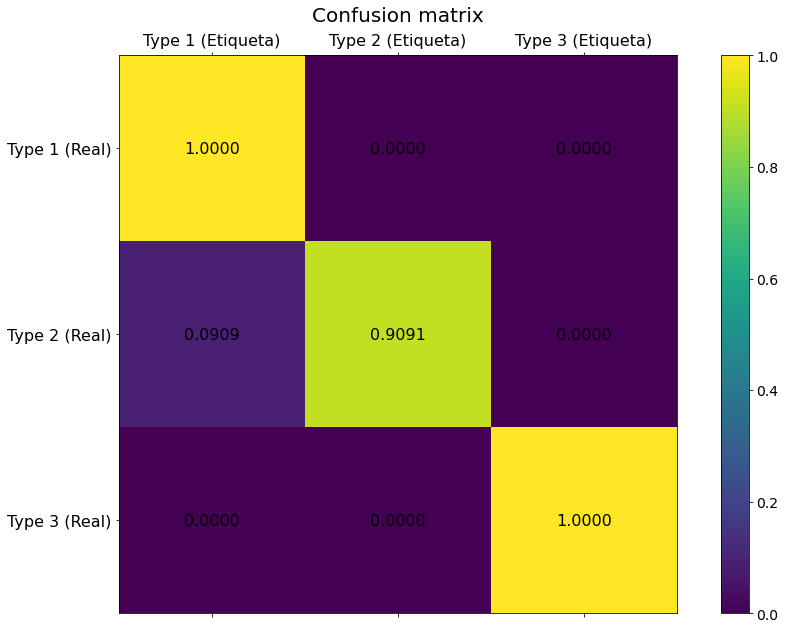

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

In [ ]:
param_grid = [
    {'base_estimator':[DecisionTreeClassifier()], 
     'n_estimators':[100,200,300,400,500],
    'max_samples':[30, 60, 100, 150, 200]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(bag_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1131, in f1_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1270, in fbeta_score
    zero_division=zero_division,
  File "/usr/local/lib/py

GridSearchCV(cv=2,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_samples=100, n_estimators=500),
             param_grid=[{'base_estimator': [DecisionTreeClassifier()],
                          'max_samples': [30, 60, 100, 150, 200],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True, scoring='f1', verbose=1)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

print('Best Score: %s' % grid_search.best_score_)
print('Mejores hiperparametros: %s' % grid_search.best_params_)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan] [{'base_estimator': DecisionTreeClassifier(), 'max_samples': 30, 'n_estimators': 100}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 30, 'n_estimators': 200}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 30, 'n_estimators': 300}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 30, 'n_estimators': 400}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 30, 'n_estimators': 500}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 60, 'n_estimators': 100}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 60, 'n_estimators': 200}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 60, 'n_estimators': 300}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 60, 'n_estimators': 400}, {'base_estimator': DecisionTreeClassifier(), 'max_samples': 60, 'n_estimators': 500}, {'base_estimator': DecisionTreeClass

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=30, bootstrap=True
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [ ]:
predictions = bag_clf.predict(X_test)
print("Accuracy",bag_clf.score(X_test, y_test))
print("Recall", recall_score(y_test, predictions, average='macro'))
print(classification_report(y_test, predictions))

Accuracy 0.9629629629629629
Recall 0.9696969696969697
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00         6

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27



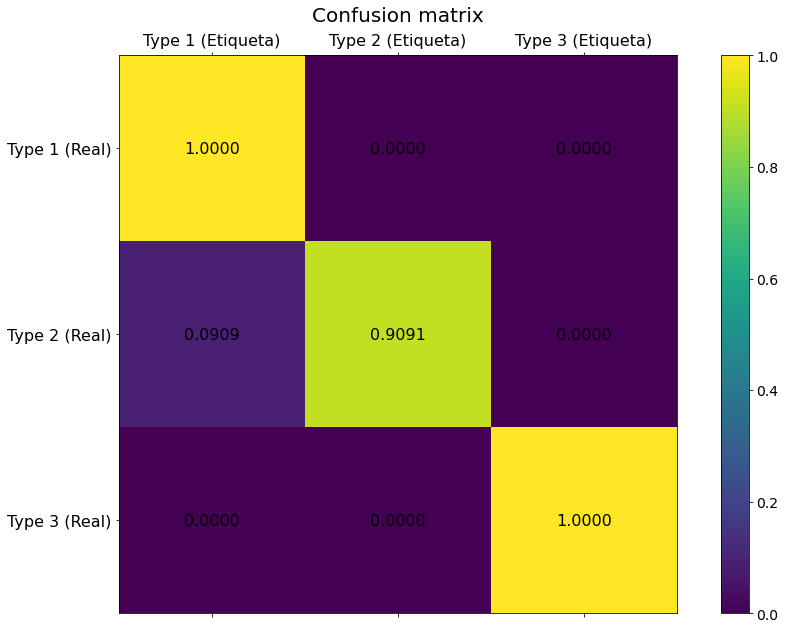

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

# Random Forest

In [ ]:
rndf_clf = RandomForestClassifier()
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

rndf_clf.score(X_val, y_val)

0.9629629629629629

In [ ]:
predictions = rndf_clf.predict(X_test)
print("Accuracy",rndf_clf.score(X_test, y_test))
print("Recall", recall_score(predictions, y_test, average='macro'))
print(classification_report(y_test, predictions))

Accuracy 1.0
Recall 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



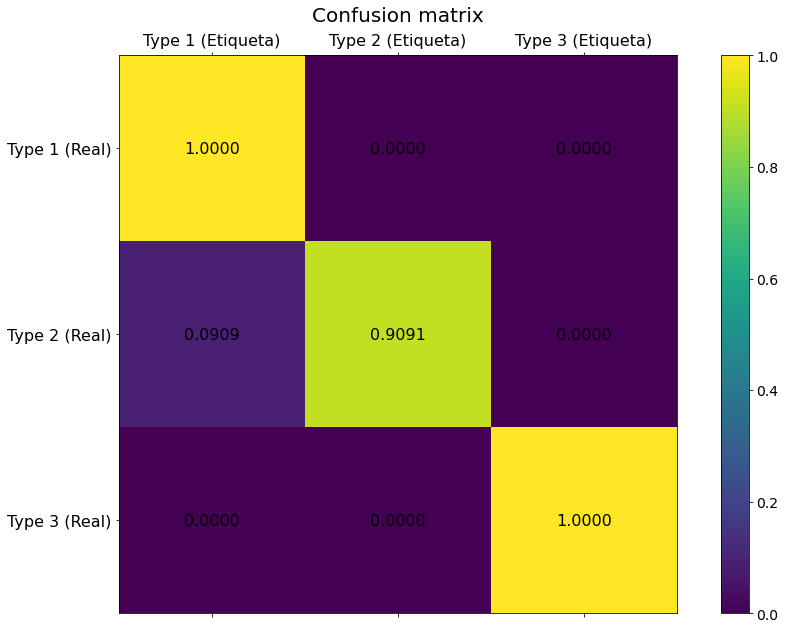

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [{'n_estimators':[10,50,100,150,200,250,300,350,400,450,500],
              'max_depth':[2,4,6,8,10,12,14,16,18,20]}]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=4,
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                          'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450, 500]}],
             return_train_score=True)

In [ ]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])

print('Best Score: %s' % grid_search.best_score_)
print('Mejores hiperparametros: %s' % grid_search.best_params_)

[0.9516129  0.96774194 0.98387097 0.98387097 0.98387097 0.97580645
 0.98387097 0.98387097 0.97580645 0.98387097 0.98387097 0.96774194
 0.97580645 0.97580645 0.98387097 0.98387097 0.98387097 0.98387097
 0.98387097 0.98387097 0.98387097 0.98387097 0.93548387 0.99193548
 0.98387097 0.96774194 0.98387097 0.99193548 0.98387097 0.98387097
 0.98387097 0.98387097 0.98387097 0.96774194 0.98387097 0.98387097
 0.99193548 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097
 0.98387097 0.98387097 0.96774194 0.98387097 0.98387097 0.98387097
 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097
 0.98387097 0.97580645 0.97580645 0.98387097 0.97580645 0.98387097
 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097
 0.97580645 0.97580645 0.97580645 0.98387097 0.98387097 0.98387097
 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097 0.98387097
 0.99193548 0.98387097 0.99193548 0.99193548 0.97580645 0.98387097
 0.98387097 0.98387097 0.98387097 0.98387097 0.94354839 0.9758

In [ ]:
rndf_clf = RandomForestClassifier(max_depth=6, n_estimators=50)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

rndf_clf.score(X_val, y_val)

0.9629629629629629

In [ ]:
predictions = rndf_clf.predict(X_test)
print("Accuracy",rndf_clf.score(X_test, y_test))
print("Recall", recall_score(predictions, y_test, average='macro'))
print(classification_report(y_test, predictions))

Accuracy 1.0
Recall 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



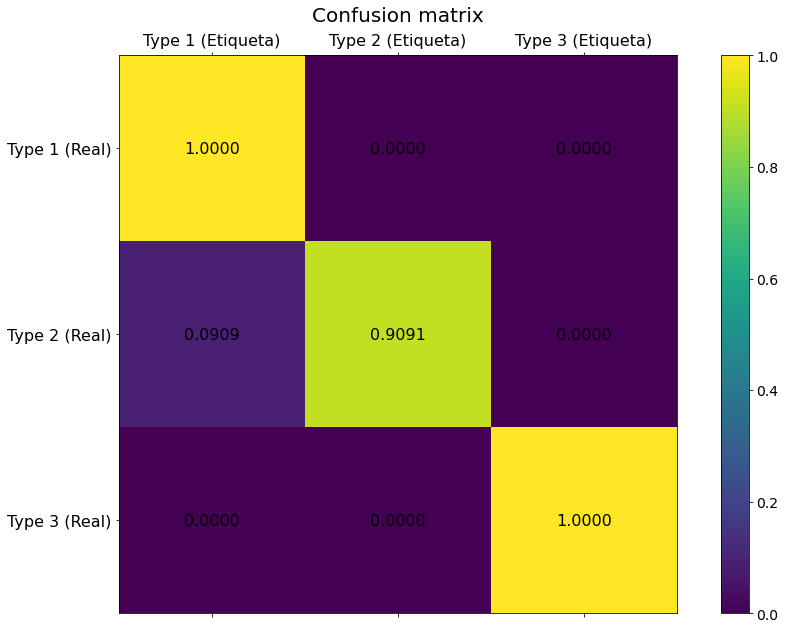

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

# KNN

In [ ]:
knn_cl = KNeighborsClassifier()
knn_cl.fit(X_train, y_train) 
y_pred_knn=knn_cl.predict(X_val)
r2=knn_cl.score(X_val, y_val)
print(r2)

0.9259259259259259


In [ ]:
predictions = knn_cl.predict(X_test)
print("Accuracy",knn_cl.score(X_test, y_test))
print("Recall", recall_score(predictions, y_test, average='macro'))
print(classification_report(y_test, predictions))

Accuracy 0.9629629629629629
Recall 0.9696969696969697
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11
           3       1.00      1.00      1.00         6

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27



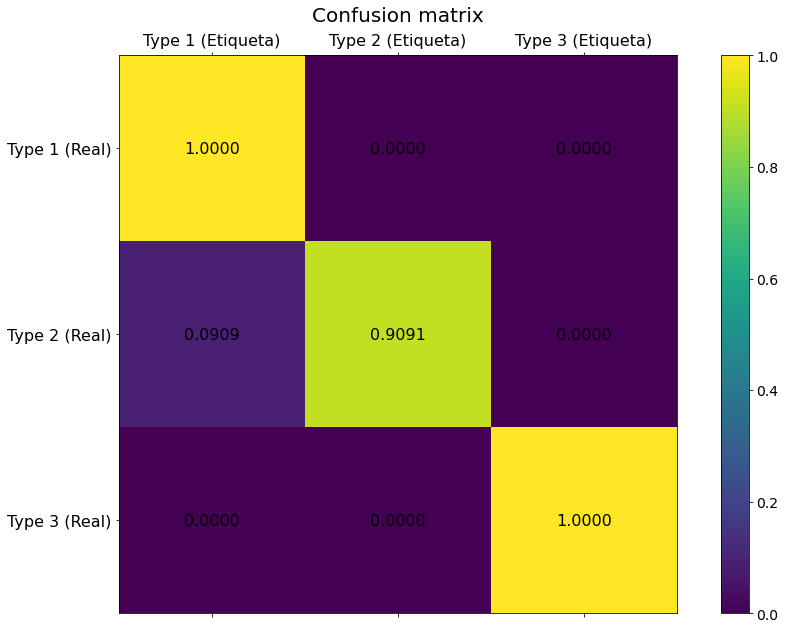

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

In [ ]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn_cl, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)

In [ ]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

print('Best Score: %s' % grid.best_score_)
print('Mejores hiperparametros: %s' % grid.best_params_)

[0.94333333 0.91033333 0.984      0.95933333 0.96733333 0.967
 0.951      0.967      0.97533333 0.967      0.97533333 0.97533333
 0.98366667 0.98366667 0.96766667 0.97533333 0.97566667 0.97566667
 0.96766667 0.96766667 0.976      0.96766667 0.984      0.96766667
 0.95966667 0.95966667 0.95966667 0.95966667 0.97566667 0.97566667
 0.97566667 0.95933333 0.97566667 0.97566667 0.97566667 0.96766667
 0.97566667 0.96766667 0.95933333 0.95933333 0.95133333 0.95133333
 0.95133333 0.943      0.943      0.951      0.943      0.951
 0.951     ] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}, {'n_neighbors': 20}, {'n_neighbors': 21}, {'n_neighbors': 22}, {'n_nei

In [ ]:
knn_cl = KNeighborsClassifier(n_neighbors=3)
knn_cl.fit(X_train, y_train) 
y_pred_knn=knn_cl.predict(X_val)
r2=knn_cl.score(X_val, y_val)
print(r2)

1.0


In [ ]:
predictions = knn_cl.predict(X_test)
print("Accuracy",knn_cl.score(X_test, y_test))
print("Recall", recall_score(predictions, y_test, average='macro'))
print(classification_report(y_test, predictions))

Accuracy 1.0
Recall 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



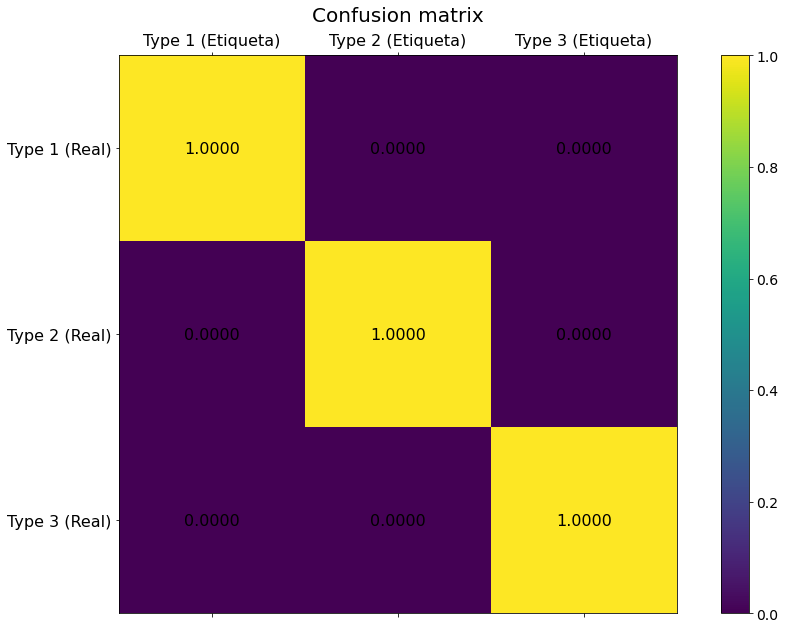

In [ ]:
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Type 1','Type 2', 'Type 3'])

# Conclusiones.

Después de completar la tarea, responde las siguientes preguntas:

* ¿Qué modelo funcionó mejor?

Todos los modelos funcionaron de manera espectacular, pero se destacan Logistic Regrssion, Random Forest y Bagged Tree (que tienen un funcionamiento muy similar), ambos modelos bajo la primera iteración sin mayor ajuste a los hiperparámetros retornaron resltados excelentes. Cabe destacar que KNN luego de search grid también obtuvo resultados muy buenos.

Es importante mencionar también el hecho de que la mayoría de los modelos tienen resultados muy buenos sin necesidad de aplicar mayor ajuste a los hiperparámetros, debido a que el tamaño de las muestras de testeo y validación son muy pequeños.

¿Cuáles son las características más importantes de tus modelos? ¿Hay algún modelo que te haya gustado más y por qué?

Las características más importantes de los modelos están intrínsecamente relacionados con sus hiperparámetros, vemos que el nivel de estimadores y la profundidad máxima de hojas permiten ajustar los resultados de muy buena manera tanto en BT como en RF.